In [1]:
import numpy as np
import pandas as pd
import os
from SimpleCycleReservoir import SimpleCycleReservoir
import matplotlib.pyplot as plt
import japanize_matplotlib
from sklearn.metrics import mean_squared_error as MSE
import random
from signalz import mackey_glass
from tqdm.notebook import tqdm

### エノン写像

In [2]:
henon_data = pd.read_csv(os.path.join('Henon_Map_time_series_ex1.csv'))
henon_data.head()

,Unnamed: 0,values
0,0,-11.97463
1,1,-11.97463
2,2,-3.96319
3,3,-9.83426
4,4,-1.07770


In [3]:
train_inputs = henon_data['values'][:1000]
train_target = henon_data['values'][1:1001]
test_data = henon_data['values'][1000:].reset_index(drop=True)

### mackey_glass

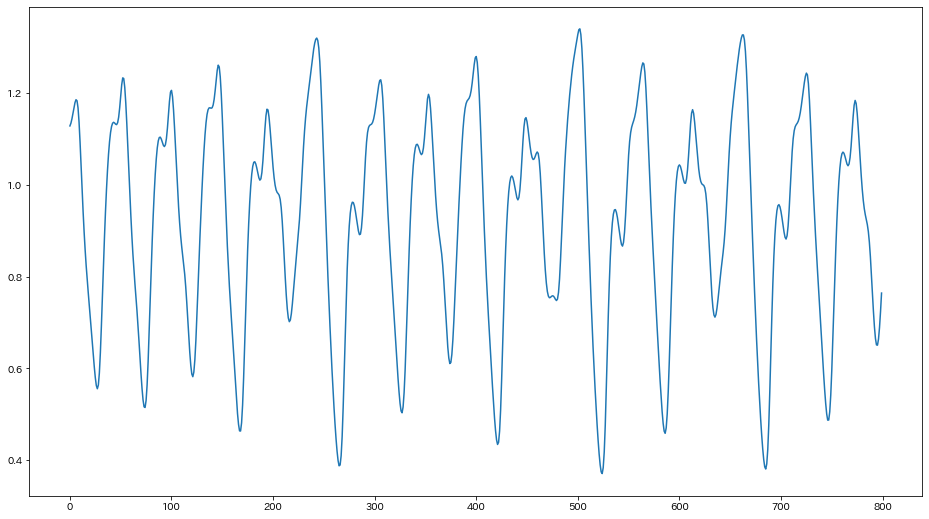

In [4]:
mg_data = mackey_glass(5200, a=0.2, b=1, c=0.9, d=17, e=10, initial=0.1)
plt.figure(figsize=(16,9))
plt.plot(mg_data[200:1000])

In [5]:
train_inputs = mg_data[200:1200]
train_target = mg_data[201:1201]
test_data = mg_data[1200:]

### パラメータ調査

In [6]:
#２層
NUM_INPUT_NODES = 1
NUM_RESERVOIR_LAYER = 2
NUM_RESERVOIR_NODES = 75
NUM_OUTPUT_NODES = 1
NUM_EPOCH = 1

In [7]:
random.seed(20210805)
np.random.seed(20210805)
rmse_list = []
lambda_lsit = []
leak_list = []
rmse_min = 0.035

for LAMBDA in tqdm(np.arange(1.000000e-14, 1.000000e-10, 1.000000e-12)):
    for LEAK_RATE in tqdm(np.arange(1.000000e-4, 1, 1.000000e-3)):
        model = SimpleCycleReservoir(train_inputs, train_target,
                                     NUM_RESERVOIR_LAYER, NUM_INPUT_NODES,
                                     NUM_RESERVOIR_NODES, NUM_OUTPUT_NODES,
                                     LEAK_RATE, LAMBDA, NUM_EPOCH)
        model.train() 
        predict_result = model.predict(test_data)
        rmse = np.sqrt(MSE(test_data[1:], predict_result[:-1]))
        if rmse < rmse_min:
            rmse_min = rmse
            predicted_results_min = predict_result
        rmse_list.append(rmse)
        lambda_lsit.append(LAMBDA)
        leak_list.append(LEAK_RATE)

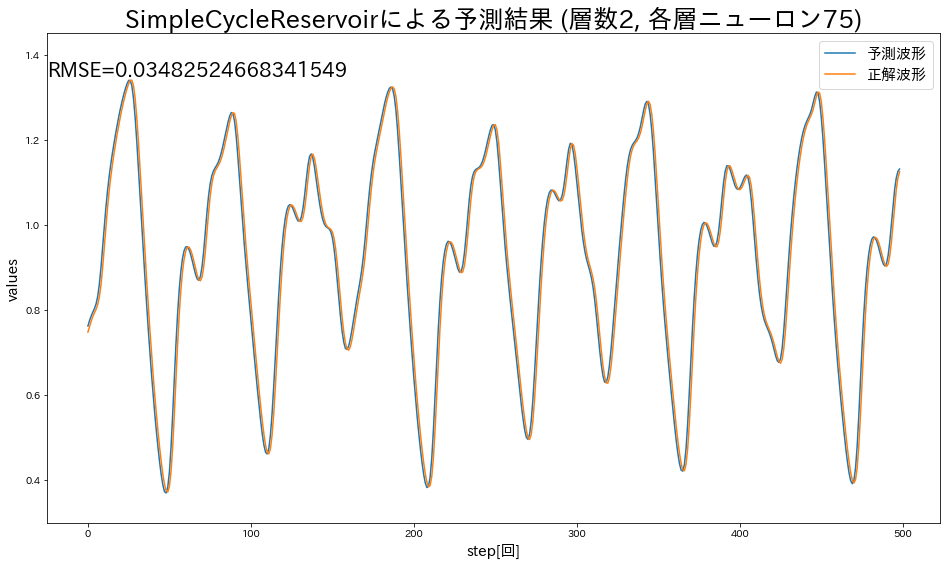

In [19]:
RMSE = np.sqrt(MSE(test_data[1:], predicted_results_min[:-1]))
plt.figure(figsize=(16,9))
plt.plot(predicted_results_min[1:500],label="予測波形")
plt.plot(test_data[:499],label="正解波形")
plt.title("SimpleCycleReservoirによる予測結果 (層数%s, 各層ニューロン%s)" %(NUM_RESERVOIR_LAYER, NUM_RESERVOIR_NODES),fontsize=25)
plt.xlabel('step[回]',fontsize=15)
plt.ylabel("values",fontsize=15)
plt.ylim(0.3, 1.45)
plt.text(-25,1.35,"RMSE=%r"%(RMSE),fontsize=20)       
plt.legend(fontsize=15)

In [9]:
result = pd.DataFrame(list(zip(leak_list, lambda_lsit, rmse_list)))
result = result.rename(columns={0:'leak', 1:'lambda', 2:'rmse'})
result.sort_values('rmse')

,leak,lambda,rmse
3212,0.2121,3.010000e-12,0.034825
37207,0.2071,3.701000e-11,0.035085
91184,0.1841,9.101000e-11,0.035125
34254,0.2541,3.401000e-11,0.035140
31216,0.2161,3.101000e-11,0.035154
...,...,...,...
167,0.1671,1.000000e-14,65.407939
599,0.5991,1.000000e-14,65.414410
159,0.1591,1.000000e-14,100.640185
483,0.4831,1.000000e-14,104.482242


### モデル変数定義

In [1]:
#２層
NUM_INPUT_NODES = 1
NUM_RESERVOIR_LAYER = 2
NUM_RESERVOIR_NODES = 75
NUM_OUTPUT_NODES = 1
NUM_EPOCH = 1
LEAK_RATE = 0.2121
LAMBDA =  3.010000e-12

#1層
NUM_INPUT_NODES = 1
NUM_RESERVOIR_LAYER = 1
NUM_RESERVOIR_NODES = 50
NUM_OUTPUT_NODES = 1
NUM_EPOCH = 10
LEAK_RATE = 0.2725
LAMBDA = 0.0001

### 訓練実行

In [2]:
random.seed(20210805)
np.random.seed(20210805)
model = SimpleCycleReservoir(train_inputs, train_target, 
                             NUM_RESERVOIR_LAYER, NUM_INPUT_NODES,
                             NUM_RESERVOIR_NODES, NUM_OUTPUT_NODES,
                             LEAK_RATE, LAMBDA, NUM_EPOCH)
model.train() 
train_result = model.get_train_result()

NameError: name 'random' is not defined

### 学習過程

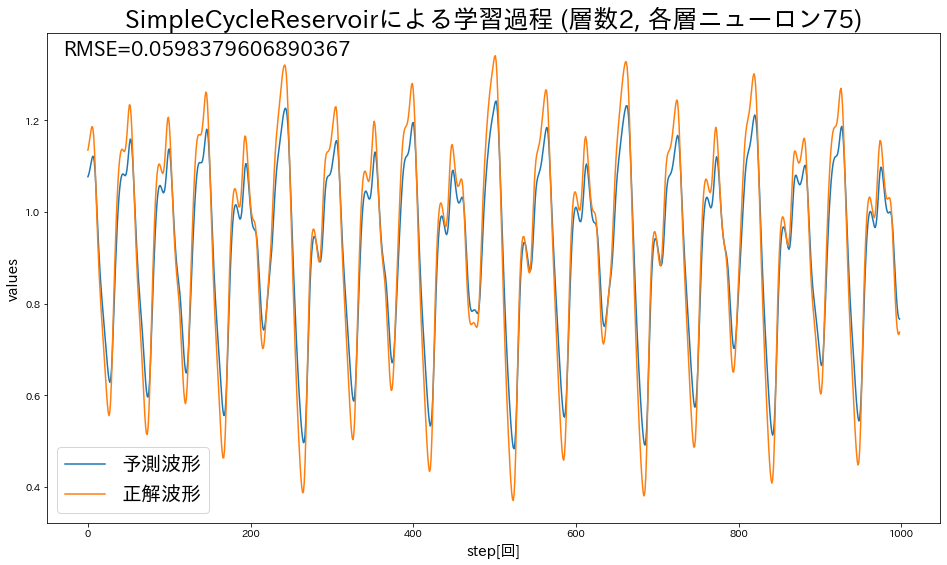

In [20]:
RMSE = np.sqrt(MSE(train_inputs[1:], train_result[:-1]))
Ymax = max(train_inputs)
if Ymax < max(train_result[:-1]):
    Ymax = max(train_result[:-1])
plt.figure(figsize=(16,9))
plt.plot(train_result[:-1],label="予測波形")
plt.plot(train_inputs[1:],label="正解波形")
plt.title("SimpleCycleReservoirによる学習過程 (層数%s, 各層ニューロン%s)" %(NUM_RESERVOIR_LAYER, NUM_RESERVOIR_NODES),fontsize=25)
plt.xlabel('step[回]',fontsize=15)
plt.ylabel("values",fontsize=15)
plt.text(-30,Ymax,"RMSE=%r"%(RMSE),fontsize=20)       
plt.legend(fontsize=20)

### 予測

In [21]:
predict_result = model.predict(test_data)

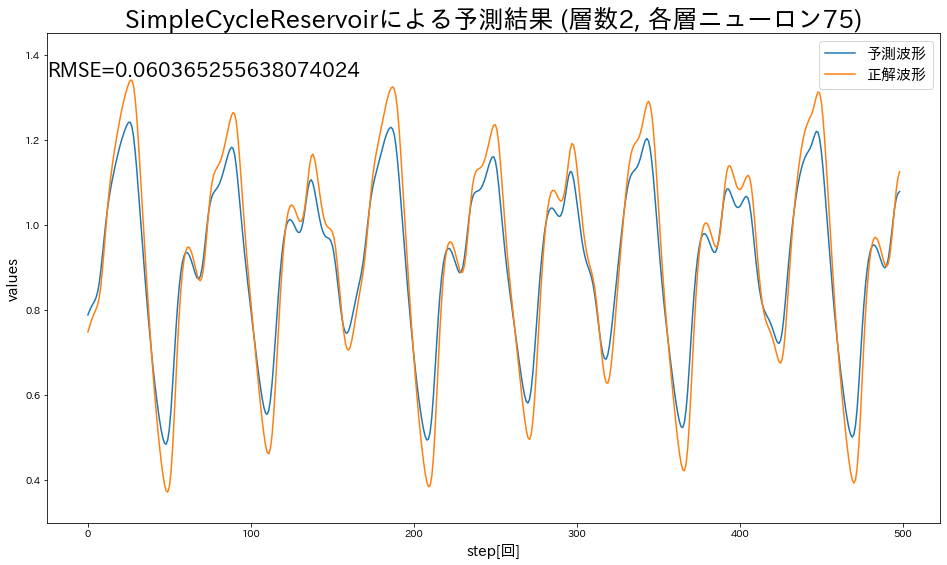

In [22]:
RMSE = np.sqrt(MSE(test_data[1:], predict_result[:-1]))
Ymax = max(train_inputs)
if Ymax < max(train_result[:-1]):
    Ymax = max(train_result[:-1])
plt.figure(figsize=(16,9))
plt.plot(predict_result[1:500],label="予測波形")
plt.plot(test_data[:499],label="正解波形")
plt.title("SimpleCycleReservoirによる予測結果 (層数%s, 各層ニューロン%s)" %(NUM_RESERVOIR_LAYER, NUM_RESERVOIR_NODES),fontsize=25)
plt.xlabel('step[回]',fontsize=15)
plt.ylabel("values",fontsize=15)
plt.ylim(0.3, 1.45)
plt.text(-25,1.35,"RMSE=%r"%(RMSE),fontsize=20)       
plt.legend(fontsize=15)

In [33]:
k_max = 101
mc_list = []
for k in np.arange(1,k_max):
    delay_input = np.concatenate([train_inputs[-k:], test_data[:len(test_data)-k]])
    square_cov = np.cov(delay_input, predict_result)**2
    var_input = np.var(test_data)
    var_output = np.var(predict_result)
    mc_k = square_cov[0,1]/(var_input * var_output) 
    mc_list.append(mc_k)
mc = sum(mc_list)
print(mc)

22.761572970030873
